<a href="https://www.kaggle.com/code/adastroabyssosque/gaussiannb-and-random-forest-comparison?scriptVersionId=165196097" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


# Checking If the Dataset Has Any Null Value

In [2]:
apple = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [3]:
apple[apple.isnull().any(axis=1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [4]:
apple.dropna(inplace=True)

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


At this point I realized that the acidity contains non-numeric values. I shall start with this first, and then go to other columns

# Data Overview

In [6]:
apple['Acidity'].head(5)

0    -0.491590483
1    -0.722809367
2     2.621636473
3     0.790723217
4     0.501984036
Name: Acidity, dtype: object

In [7]:
apple['Acidity'].tail(5)

3995     0.137784369
3996     1.854235285
3997    -1.334611391
3998    -2.229719806
3999     1.599796456
Name: Acidity, dtype: object

doesn't seem like something's wrong...

In [8]:
apple['Acidity'].apply(type).unique()

array([<class 'str'>], dtype=object)

Released. A simple conversion will do

In [9]:
apple['Acidity']=pd.to_numeric(apple['Acidity'], errors='coerce')

In [10]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


Done. Let's make graphs about each columns

## Import Libraries

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

## Graph the Distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

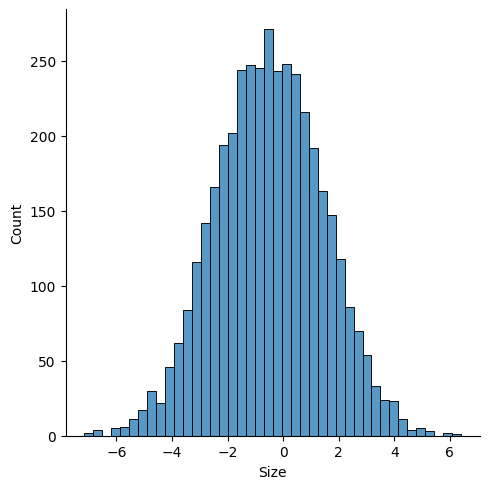

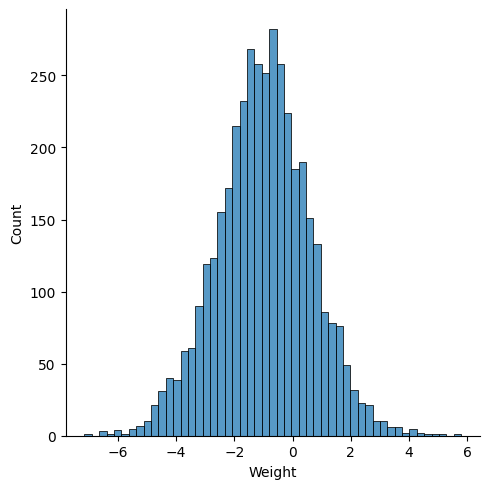

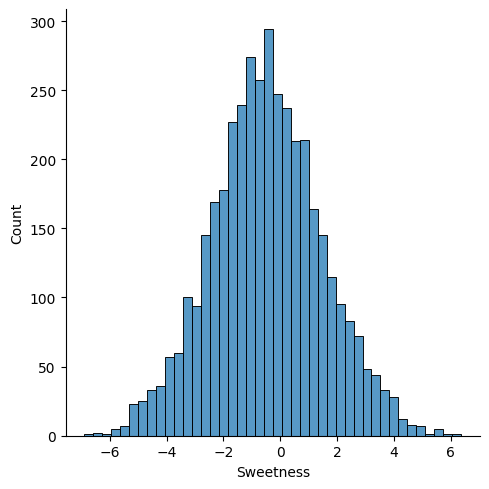

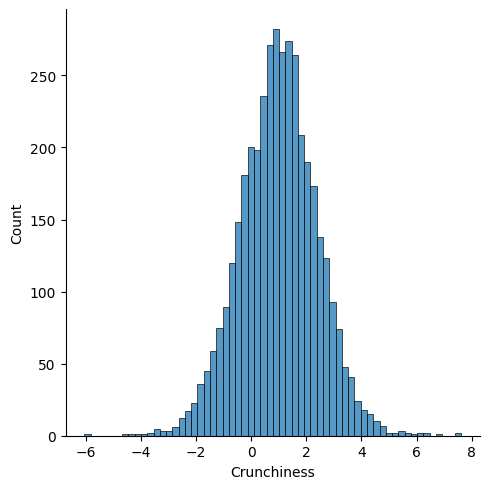

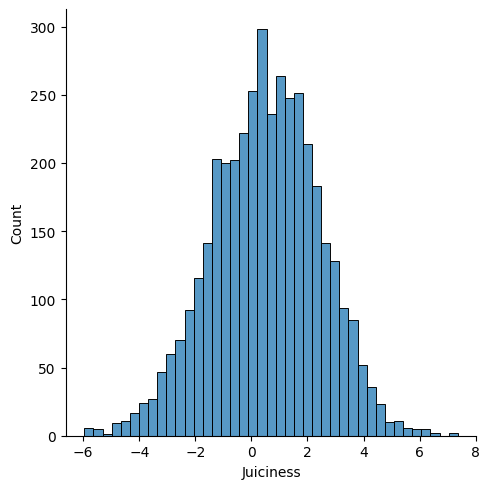

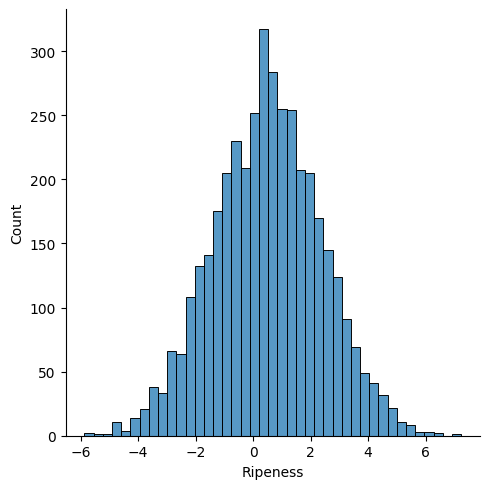

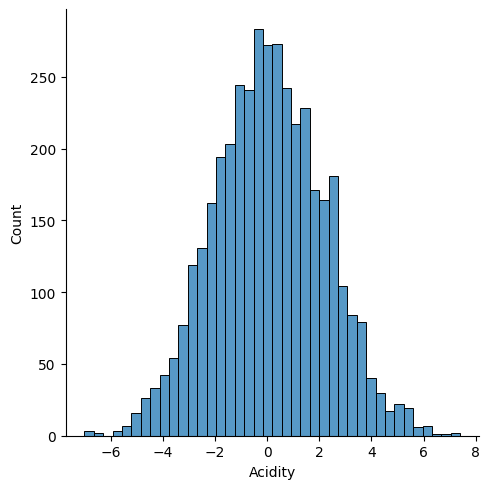

In [12]:
N_PLOT=7

cols = list(apple.columns)
cols = cols[1:len(cols)-1]

for i in range(N_PLOT):
    sns.displot(apple, x=cols[i])

Nothing left or right skewed, all normal distributions

## Quality ---- Our Final (Hopefully) Prediction Result 

In [13]:
apple['Quality'].unique()

array(['good', 'bad'], dtype=object)

<Axes: xlabel='Quality', ylabel='count'>

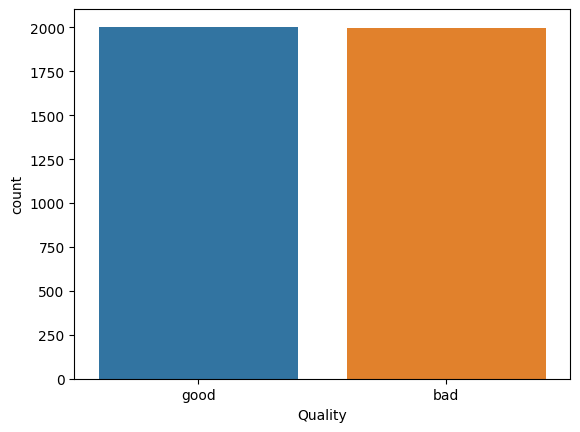

In [14]:
sns.countplot(x='Quality', data=apple)

There are about equal numbers of good and bad apples

Apply onehot encoding to this column

In [15]:
encoded = pd.get_dummies(apple['Quality'])
apple = apple.join(encoded)
apple = apple.drop(['Quality', 'bad'], axis=1)

In [16]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   good         4000 non-null   bool   
dtypes: bool(1), float64(8)
memory usage: 285.2 KB


In [17]:
apple.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,good
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,True
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,True
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,False
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,True
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,True


## Correlation between apple attributes and quality

In [18]:
apple=apple.drop('A_id', axis=1)

In [19]:
corr = apple.corr(method='pearson')
corr.style.background_gradient(cmap='PiYG')

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,good
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
good,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


### Summary
* Size, sweetness and juiciness are relatively, strongly positively correlated with the good quality. The correlation may seem to be low due to the binary value of good quality
* Ripeness is relatively, strongly negatively correlated with the good quality. 

Can we build a model for classfication on apple quality? 

# Model Building

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(apple.iloc[:,0:7] , apple[['good']], 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 7)
(800, 7)
(3200, 1)
(800, 1)


## Building Model----GaussianNB

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

model = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GridSearchCV(estimator=model, 
                 param_grid=params_NB, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy') 
model.fit(X_train, np.ravel(y_train, order = 'C'))

prediction = model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


## Evaluate GaussianNB

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(prediction, y_test)
accuracy

0.7475

In [23]:
from sklearn.metrics import confusion_matrix

mgnb = confusion_matrix(y_test, prediction)
mgnb

array([[313,  96],
       [106, 285]])

<Axes: >

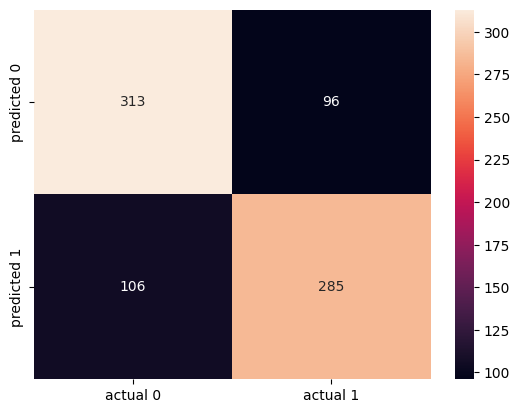

In [24]:
cm_columns = ['predicted 0', 'predicted 1']
cm_rows = ['actual 0', 'actual 1']
df_nb = pd.DataFrame(mgnb, index = cm_columns, columns = cm_rows)
sns.heatmap(df_nb, annot=True, fmt='d')

## Building Model----Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [26]:
model_rf = RandomForestClassifier()
model.fit(X_train, np.ravel(y_train, order='C'))
y_pred = model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


## Evaluate Random Forest

In [27]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.7475

<Axes: >

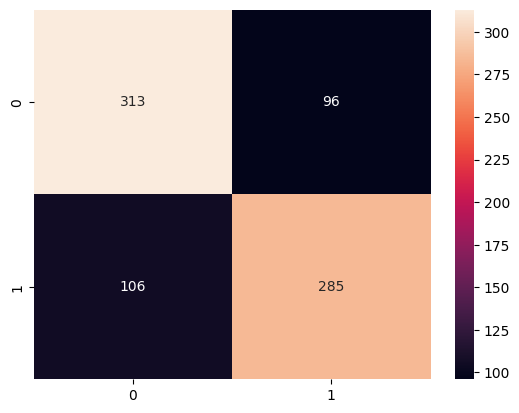

In [28]:
cmrf = confusion_matrix(y_test, y_pred)
sns.heatmap(cmrf, annot=True, fmt='d')

# Summary 01

So far we could conclude that, GaussianNB and RandomForest perform equally on classifying apples to good or bad based on this dataset.